In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


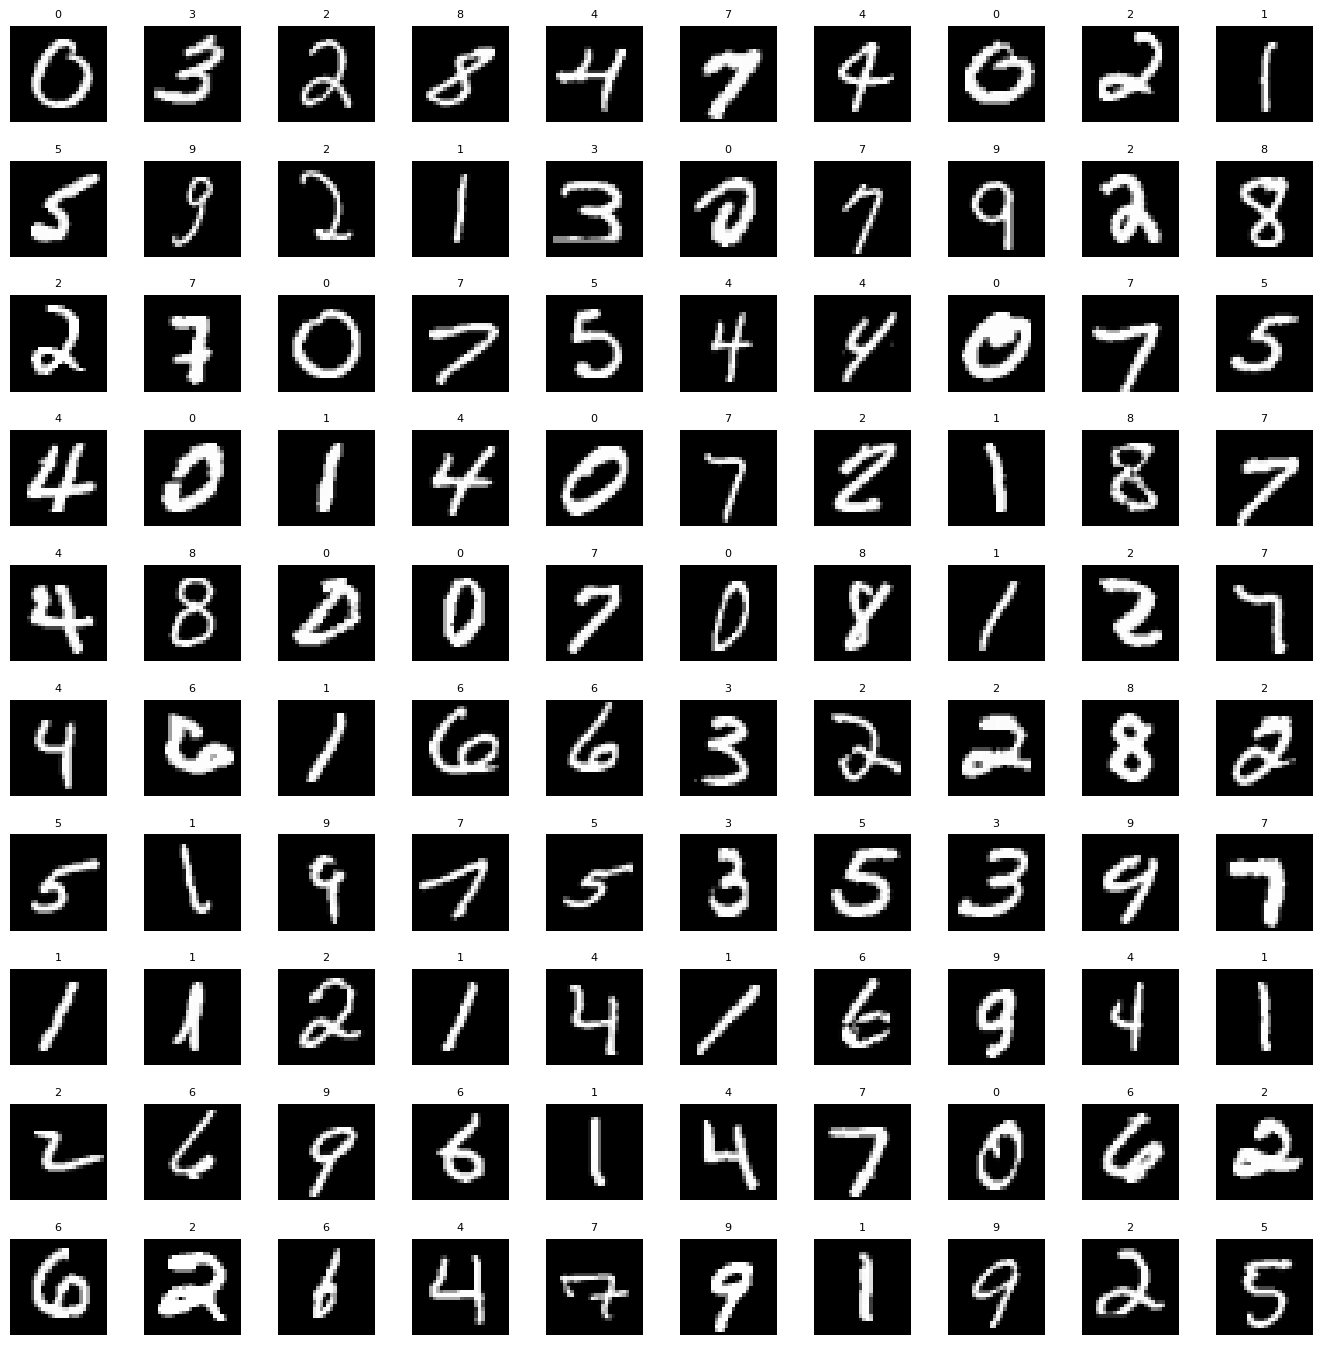

In [25]:
labels = [str(i) for i in range(10)]
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel()
n_train = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index].reshape(28, 28), cmap='gray')
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.show()

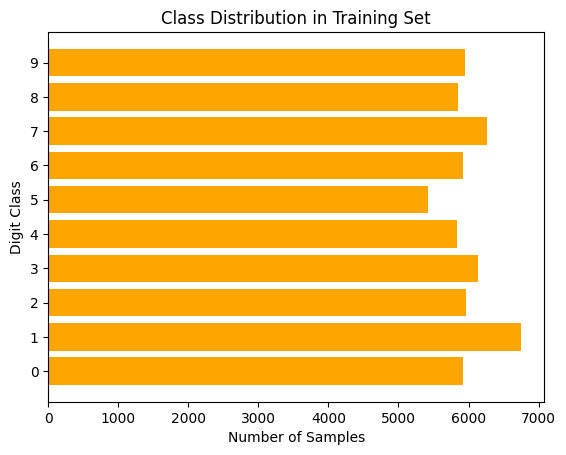

In [43]:
classes_name = [str(i) for i in range(10)]
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts, color="orange")
plt.title('Class Distribution in Training Set')
plt.xlabel('Number of Samples')
plt.ylabel('Digit Class')
plt.show()

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y1_train = to_categorical(y_train, 10)
y1_test = to_categorical(y_test, 10)

In [33]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y1_train, epochs=10, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9015 - loss: 0.3110 - val_accuracy: 0.7937 - val_loss: 0.5978
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.0635 - val_accuracy: 0.9820 - val_loss: 0.0585
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9522 - val_loss: 0.1662
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9880 - loss: 0.0361 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0306 - val_accuracy: 0.9855 - val_loss: 0.0590
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9711 - val_loss: 0.0982
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9735 - val_loss: 0.1079


In [35]:
loss, accuracy = model.evaluate(X_test,y1_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.1229
Test Accuracy: 0.9728


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.96      0.98      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       1.00      0.93      0.96      1028
           8       0.88      1.00      0.93       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



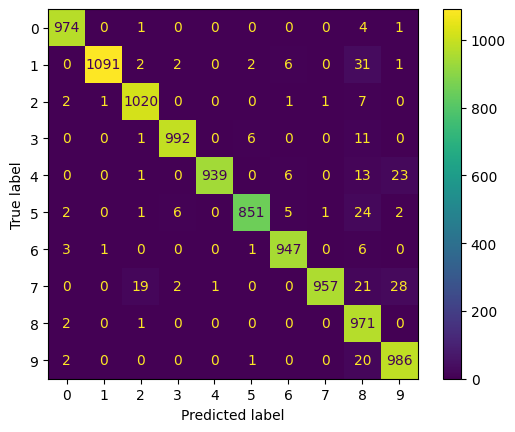

In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
plt.show()

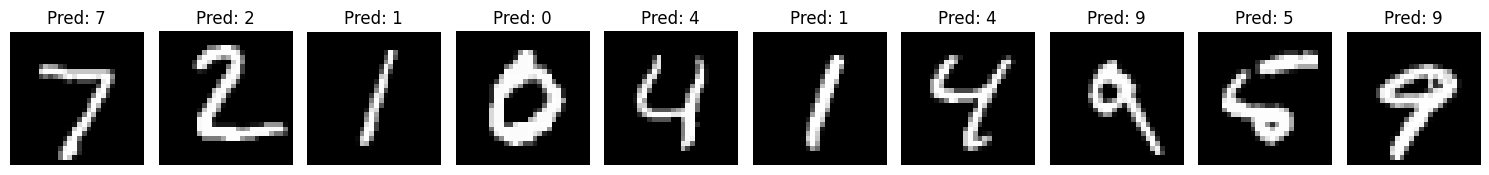

In [37]:
num_samples = 10
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


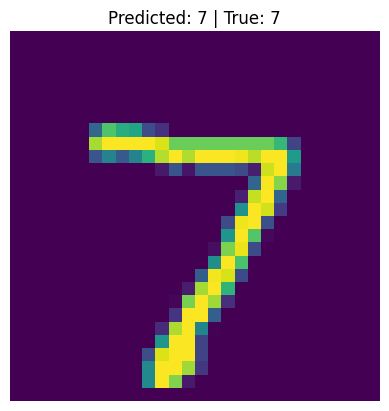

In [44]:
index = 0
image = X_test[index].reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(image), axis=1)[0]
true_class = y_test[index]
plt.imshow(X_test[index].reshape(28, 28), cmap='viridis')
plt.title(f"Predicted: {predicted_class} | True: {true_class}")
plt.axis('off')
plt.show()

In [39]:
labels = [str(i) for i in range(10)]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{labels[predicted_label]} {100*np.max(predictions_array):2.0f}% ({labels[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


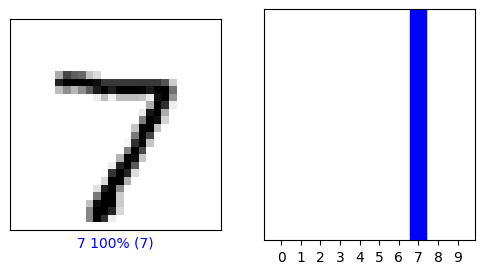

In [41]:
predictions = model.predict(X_test)
num = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(num, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(num, predictions, y_test)
plt.show()

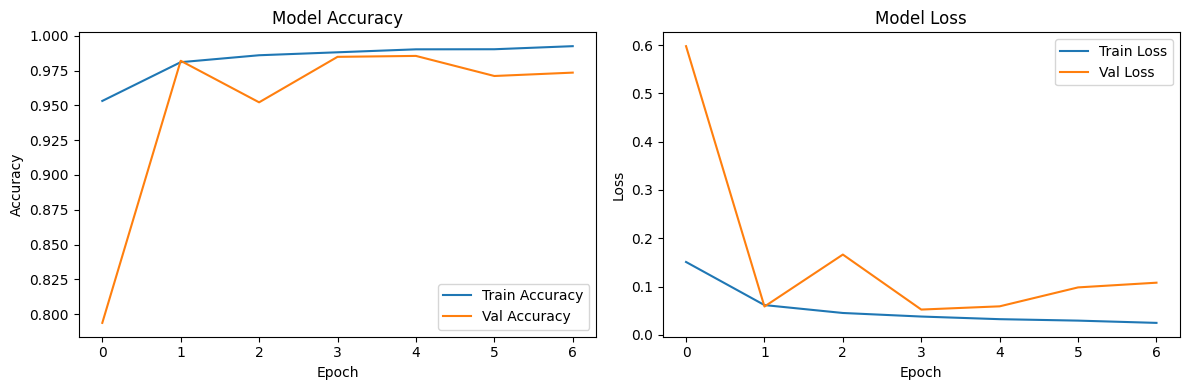

In [42]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()